In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

 # Data Preparation

In [2]:
# Read the AMD Historical Closing Prices
amd_data = Path("../Resources/amd_historical.csv")
amd = pd.read_csv(
    amd_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
amd.head()

,Symbol,NOCP
Trade DATE,,
2019-05-13,AMD,26.24
2019-05-10,AMD,27.96
2019-05-09,AMD,27.21
2019-05-08,AMD,27.09
2019-05-07,AMD,26.66


In [3]:
# Read the MU Historical Closing Prices
mu_data = Path("../Resources/mu_historical.csv")
mu = pd.read_csv(
    mu_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
mu.head()

,Symbol,NOCP
Trade DATE,,
2019-05-13,MU,37.38
2019-05-10,MU,38.94
2019-05-09,MU,39.27
2019-05-08,MU,39.75
2019-05-07,MU,40.26


In [5]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_prices = pd.concat([amd, mu], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48


 # Portfolio Returns

In [6]:
all_returns = all_prices.pct_change().dropna()
all_returns.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-16,0.029719,0.046103
2018-05-17,0.000000,-0.031858
2018-05-18,0.014041,-0.023949
2018-05-21,-0.000769,0.039146
2018-05-22,-0.000770,0.063987


In [10]:
amd_weight = 0.5
mu_weight = 1 - amd_weight

portfolio_return = amd_weight * all_returns["AMD"] + mu_weight * all_returns["MU"]
portfolio_return.head()

Trade DATE
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
2018-05-22    0.031609
dtype: float64

In [12]:
weight = [0.5, 0.5]
portfolio_returns = all_returns.dot(weight)
portfolio_returns.head()


Trade DATE
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
2018-05-22    0.031609
dtype: float64

In [13]:
 # Risk Management

In [14]:
volatility = all_returns.std() * np.sqrt(252)
volatility

Symbol
AMD    0.682623
MU     0.461623
dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

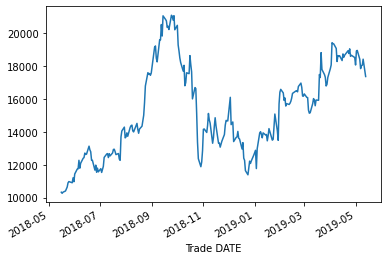

In [15]:
initial_investment = 10000
weights = [0.8, 0.2]
portfolio_returns = all_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

(initial_investment * cumulative_returns).plot()

<AxesSubplot:xlabel='Trade DATE'>

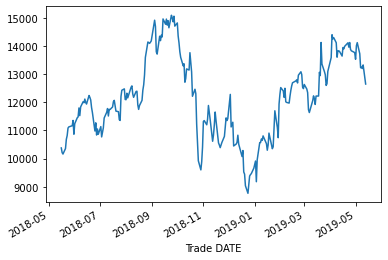

In [16]:
initial_investment = 10000
weights = [0.5, 0.5]
portfolio_returns = all_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

(initial_investment * cumulative_returns).plot()